# ML - Cheatsheet

### Model Selection
1. KFold  
2. StratifiedKFold  
3. cross_val_score  
4. GridSearchCV
5. train_test_split

### Decomposition & Dimensionality Reduction 
1. PCA  
2. t-SNE  
3. UMAP  

### Preprocessing
1. MinMaxScaler  
2. StandardScaler  
3. pd.get_dummies  
4. OneHotEncoder  
5. LabelEncoder  

### Supervised Learning  
**(Labeled data: X + y)**  

🔹 Classification  
- Logistic Regression  
- Decision Tree Classifier  
- Random Forest Classifier  
- K-Nearest Neighbors (KNN)  
- Support Vector Machine (SVM)  
- Naive Bayes  
- BaggingClassifier  
- AdaBoost, Gradient Boosting  

🔹 Regression  
- Linear Regression  
- Decision Tree Regressor  
- Random Forest Regressor  
- Ridge/Lasso Regression  
- SVR (Support Vector Regressor)  

### Unsupervised Learning  
**(Unlabeled data: Only X)**  

🔹 Clustering  
1. KMeans  
2. DBSCAN  
3. Hierarchical Clustering  
4. Gaussian Mixture Models (GMM)  

### Model Evaluation and Metrics
1. classification_report  
2. confusion_matrix  

### Import & Utilities
1. Pickle  
2. Pipeline

### Lets start 

In [3]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
# Traning data framing
df1 = pd.DataFrame( iris.data , columns = ["sepal_length" , "sepal_width" , "petal_length" , "petal_width"])
df2 = pd.DataFrame( iris.target , columns = ["Target"])
df3 = pd.DataFrame(iris.target_names , columns= ["Target_names"])
df4 = pd.concat([df1 , df2] , axis=1)
df5 = df3.reset_index()
df = df4.merge(df5 , how="left" , left_on="Target" , right_on="index")
df = df.drop("index" , axis=1)

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Target,Target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
x = df.drop(["Target" , "Target_names"] , axis = 1)
y = df["Target"]

## Model Selection

In [8]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Train Test Split

In [117]:
# To devide data into training and testing set
from sklearn.model_selection  import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.3)

### KFold

In [10]:
# Same as KFold, but preserves the percentage of samples per class (useful in classification).
from sklearn.model_selection import KFold

kfold = KFold(n_splits= 5 , shuffle=True , random_state=42)
for train_index , test_index in kfold.split(df):
    train_index , test_index
train_index.shape , test_index.shape

((120,), (30,))

### Startified KFold

In [11]:
# Same as KFold, but preserves the percentage of samples per class (useful in classification). 
from sklearn.model_selection import StratifiedKFold 
skf =  StratifiedKFold(n_splits=5 , shuffle=True)
for skf_train_index, skf_test_index in skf.split(x, y):
    X_train, X_test = x.iloc[skf_train_index], x.iloc[skf_test_index]
    y_train, y_test = y.iloc[skf_train_index], y.iloc[skf_test_index]

### cross_val_score

In [12]:
# Automatically splits data, trains, tests, and returns scores for each fold.
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
scores = cross_val_score(model, x, y, cv=5)

print("CV Scores:", scores)
print("Mean Accuracy:", scores.mean())

CV Scores: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Mean Accuracy: 0.9533333333333334


### GridSearchCV

In [13]:
# Searches for the best hyperparameters by trying all combinations from a given parameter grid using cross-validation.
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(x, y)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Params: {'C': 1, 'kernel': 'linear'}
Best Score: 0.9800000000000001


##  Preprocessing

####   MInMaxScalar

In [25]:
# it it used to scaling data into normalization. Scales features to a fixed range, typically [0, 1].
from sklearn.preprocessing import MinMaxScaler
minmaxscalar = MinMaxScaler()
scaled_df = pd.DataFrame(minmaxscalar.fit_transform(df[["sepal_length", "sepal_width"]]))
scaled_df.head()

,0,1
0,0.222222,0.625000
1,0.166667,0.416667
2,0.111111,0.500000
3,0.083333,0.458333
4,0.194444,0.666667


####   Standard Scalar

In [26]:
# it it used to scaling data into standardlization. Standardizes features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler
standardscalar = StandardScaler()
scaled_df = pd.DataFrame(standardscalar.fit_transform(df[["sepal_length", "sepal_width"]]))
scaled_df.head()

,0,1
0,-0.900681,1.019004
1,-1.143017,-0.131979
2,-1.385353,0.328414
3,-1.506521,0.098217
4,-1.021849,1.249201


MinMaxScaler

| Feature                    | Details                                                                                                  |
| -------------------------- | -------------------------------------------------------------------------------------------------------- |
| **Purpose**                | Scales data to a fixed range: usually **\[0, 1]**                                                        |
| **Formula**                | $X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}$                                           |
| **Effect**                 | Transforms **minimum to 0** and **maximum to 1**                                                         |
| **Sensitive to outliers?** | ✅ **Yes**, because it depends on min and max values                                                      |
| **Use case**               | When you need **bounded features** (e.g., neural networks, distance-based models like KNN, SVM with RBF) |
| **Preserves shape?**       | ✅ Yes, maintains the **original distribution** shape                                                     |
| **Example**                | Useful when data is not normally distributed but needs to be in \[0, 1]                                  |

StandardScaler

| Feature                    | Details                                                                                                     |
| -------------------------- | ----------------------------------------------------------------------------------------------------------- |
| **Purpose**                | Standardizes data to have **zero mean and unit variance**                                                   |
| **Formula**                | $X_{\text{scaled}} = \frac{X - \mu}{\sigma}$                                                                |
| **Effect**                 | Mean becomes 0, standard deviation becomes 1                                                                |
| **Sensitive to outliers?** | ✅ **Yes**, due to mean and standard deviation                                                               |
| **Use case**               | When features follow a **normal/Gaussian distribution** (e.g., linear regression, logistic regression, PCA) |
| **Preserves shape?**       | ❌ No, can **change the shape** of the distribution                                                          |
| **Example**                | Good for algorithms that assume Gaussian features or use gradients (like logistic regression)               |


### Get Dummies

In [29]:
# convert categorical variables into numarical to understand model
df_dummies = pd.get_dummies(df , drop_first=True)
df_dummies.head()

,sepal_length,sepal_width,petal_length,petal_width,Target,Target_names_versicolor,Target_names_virginica
0,5.1,3.5,1.4,0.2,0,False,False
1,4.9,3.0,1.4,0.2,0,False,False
2,4.7,3.2,1.3,0.2,0,False,False
3,4.6,3.1,1.5,0.2,0,False,False
4,5.0,3.6,1.4,0.2,0,False,False


### OneHotEncoder

In [63]:
# it converts categorical variables into numarical variables to understand the mmodel
from sklearn.preprocessing import OneHotEncoder

encoder_1 = OneHotEncoder(sparse_output=False) # sparse=False returns a NumPy array
encoded_1 = encoder_1.fit_transform(df[["Target_names"]])
encoded_df  = pd.DataFrame(encoded_1 , columns=  ["first" , "second", "third"])
encoded_df.head()

,first,second,third
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


### LabelEncoder 

In [64]:
# it is used to convert categorical variables into numarical and it used on Target variable and it also goot for ordinal categorical variablabs
from sklearn.preprocessing import LabelEncoder

encoder_2 = LabelEncoder()
encoded_2 = encoder_2.fit_transform(df["Target_names"])
encoded_df2 = pd.DataFrame(encoded_2)
encoded_df2.head()

,0
0,0
1,0
2,0
3,0
4,0


| Method           | Purpose                     | Use On      | Output Format   | Can Reverse? | Pipeline Compatible? |
| ---------------- | --------------------------- | ----------- | --------------- | ------------ | -------------------- |
| `pd.get_dummies` | Feature encoding (manual)   | X (feature) | DataFrame (0/1) | ❌ Hard       | ❌ No                 |
| `OneHotEncoder`  | Feature encoding (flexible) | X (feature) | NumPy/DataFrame | ✅ Yes        | ✅ Yes                |
| `LabelEncoder`   | Target label encoding       | y (target)  | Integer values  | ✅ Yes        | ✅ Yes (on y only)    |

Common Mistakes to Avoid:
❌ Don’t use LabelEncoder on input features — it may mislead the model into treating categories as ordinal.
✅ Prefer OneHotEncoder or pd.get_dummies() for categorical features.
✅ Use LabelEncoder strictly for encoding target labels.

## Decomposition & Dimensionality Reduction 
1. PCA  
2. t-SNE  
3. UMAP  

#### PCA

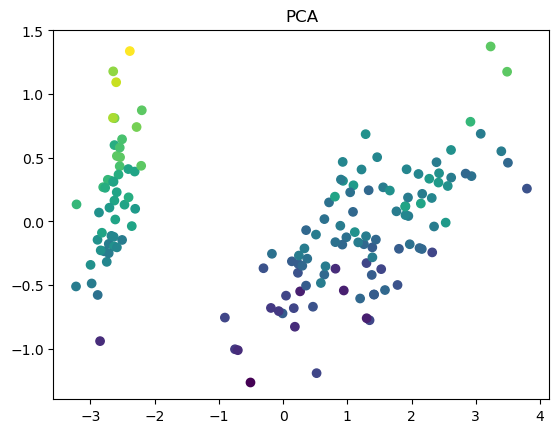

In [85]:
# Projects data to orthogonal axes that capture the maximum variance. Linear method.

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["sepal_width"])
plt.title("PCA")
plt.show()

#### t-SNE 

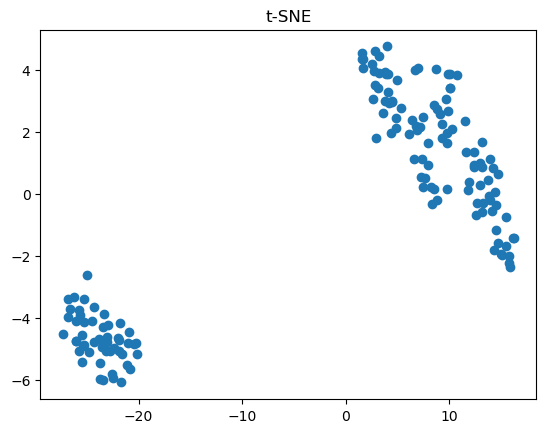

In [90]:
#Converts pairwise similarities into probabilities, then minimizes KL divergence between high and low-dimensional similarities.
# Focuses on local structure. Non-linear.

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(x)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title("t-SNE")
plt.show()

#### UMAP 

In [99]:
#Models data as a graph and optimizes it for a low-dimensional layout.
#Captures local & some global structure , Non-linear.
pip install umap-learn
import umap.umap_ as umap

umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(x)

plt.scatter(X_umap[:, 0], X_umap[:, 1], c=data.target)
plt.title("UMAP")
plt.show()

SyntaxError: invalid syntax (2019835734.py, line 3)

| Technique | Linear? | Focus               | Speed               | Can transform new data? | Best for                           |
| --------- | ------- | ------------------- | ------------------- | ----------------------- | ---------------------------------- |
| PCA       | ✅ Yes   | Global Var          | ⚡ Fast              | ✅ Yes                   | Feature compression, noise removal |
| t-SNE     | ❌ No    | Local               | 🐢 Slow             | ❌ No                    | Cluster visualization              |
| UMAP      | ❌ No    | Local + some global | ⚡ Faster than t-SNE | ✅ Yes (partial)         | Fast visualization, embedding      |

| Task                              | Best Tool       |
| --------------------------------- | --------------- |
| Fast linear reduction             | ✅ PCA           |
| Visualizing high-dimensional data | ✅ t-SNE or UMAP |
| Real-time embedding or deployment | ✅ UMAP          |


## Supervised Learning

### Logistic Regression

In [122]:
# A linear model for classification that predicts probabilities using the sigmoid function.
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train, y_train)
log_reg.predict(x_test)
log_reg.score(x_test , y_test)

C:\myapps\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9777777777777777

### Decesion Tree Classifier

In [126]:
# A tree-based model that splits data based on information gain (entropy or Gini).
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
dt.predict(x_test)
dt.score(x_test , y_test)

0.9555555555555556

### Random Classifier

In [133]:
# An ensemble of decision trees using bagging to improve accuracy and reduce overfitting.
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
rf.predict(x_test)
rf.score(x_test , y_test)

0.9777777777777777

### KNN

In [129]:
# A lazy learner that classifies based on the majority label of k-nearest neighbors.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
knn.predict(x_test)
knn.score(x_test , y_test)

0.9777777777777777

### SVC

In [130]:
# Finds the optimal hyperplane that separates classes with maximum margin. Can be linear or kernel-based.
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=42)
svm.fit(x_train, y_train)
svm.predict(x_test)
svm.score(x_test , y_test)

0.9777777777777777

### GaussianNB

In [131]:
#A probabilistic classifier based on Bayes’ theorem assuming feature independence.
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
nb.predict(x_test)
nb.score(x_test , y_test)

0.9555555555555556

### Bagging 

In [132]:
#An ensemble method that combines predictions from multiple base estimators (like decision trees) trained on bootstrapped samples.
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging.fit(x_train, y_train)
bagging.predict(x_test)
bagging.score(x_test , y_test)

C:\myapps\Anaconda\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.9777777777777777

## Unsupervised Learning

### KMeans Clustering

In [1]:
from sklearn.cluster import KMeans

# KMeans groups data into k clusters by minimizing intra-cluster variance
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)
labels = kmeans.labels_  # Cluster labels for each point

NameError: name 'X' is not defined

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

# DBSCAN groups together closely packed points and marks outliers as noise
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(df)
labels = dbscan.labels_

### Hierarchical

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# AgglomerativeClustering builds clusters bottom-up by merging the closest pairs
hc = AgglomerativeClustering(n_clusters=3)
labels = hc.fit_predict(X)

# Optional: For dendrogram visualization
# from scipy.cluster.hierarchy import dendrogram, linkage
# import matplotlib.pyplot as plt
# Z = linkage(X, method='ward')
# dendrogram(Z)
# plt.show()

### Gaussian Mixture Models (GMM)

In [ ]:
from sklearn.mixture import GaussianMixture

# GMM models data as a mixture of multiple Gaussian distributions
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)
labels = gmm.predict(X)

## Model Evaluation and Metrics

### Classification report

In [ ]:
from sklearn.metrics import classification_report

# 💡 Theory:
# classification_report gives a full performance summary for classification models:
# - Precision: Of all predicted positives, how many were actually positive?
# - Recall: Of all actual positives, how many did the model correctly identify?
# - F1-score: Harmonic mean of precision and recall (good balance when data is imbalanced)
# - Support: Number of actual samples in each class

# Example:
y_true = [0, 1, 1, 0, 1, 0]
y_pred = [0, 1, 0, 0, 1, 1]

print("Classification Report:")
print(classification_report(y_true, y_pred))

| Metric        | Best For                         | Formula                        |
| ------------- | -------------------------------- | ------------------------------ |
| **Accuracy**  | Balanced classes                 | (TP + TN) / Total              |
| **Precision** | When False Positives are costly  | TP / (TP + FP)                 |
| **Recall**    | When False Negatives are costly  | TP / (TP + FN)                 |
| **F1 Score**  | Balance between precision/recall | 2 × (Precision × Recall)/(P+R) |


### Confuasion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

# 💡 Theory:
# confusion_matrix compares the true labels with predicted labels
# - It's a 2x2 (for binary classification) or NxN (multi-class) matrix
# - Format:
#     [[TN, FP],
#      [FN, TP]]
# - TP = True Positive, TN = True Negative, FP = False Positive, FN = False Negative
#   Helps you calculate accuracy, precision, recall, etc.

# Example:
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

### Accuracy score

In [ ]:
from sklearn.metrics import accuracy_score

# 💡 Theory:
# Accuracy = (Correct predictions) / (Total predictions)
# Use only when classes are balanced; otherwise, misleading.

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

### ROC AUC Score

In [ ]:
from sklearn.metrics import roc_auc_score

# 💡 Theory:
# Measures how well the model distinguishes between classes.
# ROC AUC ranges from 0.0 to 1.0 — higher is better.
# Use predicted probabilities, not hard labels.

# Simulating predicted probabilities for class 1
y_prob = [0.1, 0.9, 0.4, 0.2, 0.8, 0.7]
roc_auc = roc_auc_score(y_true, y_prob)
print("ROC AUC Score:", roc_auc)

## Import and Utilities

### Pickle

In [ ]:
import pickle
# 💡 Theory:
# Pickle is used to serialize and save Python objects (like trained ML models) to a file,
# and later load them without retraining.

# --- Save Model to Disk ---
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# --- Load Model from Disk ---
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# --- Predict using loaded model ---
y_pred = loaded_model.predict(X_test)

### Pipeline

In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

# 💡 Theory:
# Pipeline allows you to bundle preprocessing + modeling steps together
# Helps avoid data leakage and makes code cleaner

trf1 = ColumnTransformer([
    ('scaled' , MinMaxScaler() , [0,1,2,3])
] , remainder='passthrough')

trf3 = DecisionTreeClassifier()

pipe = Pipeline([
    ('trf1' , trf1),
    ('trf3' , trf3)
])

model2 = pipe.fit(x_train , y_train)
y_pred = pipe.predict(x_test)